In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix


file_path =(r"C:\Users\Satyug\Downloads\heart.csv")  
df = pd.read_csv(file_path)


X = df.drop(columns='target')
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = recall  
specificity = tn / (tn + fp)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F Score: {f1}')
print(f'Accuracy: {accuracy}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
                                    

Precision: 0.84375
Recall: 0.84375
F Score: 0.84375
Accuracy: 0.8360655737704918
Sensitivity: 0.84375
Specificity: 0.8275862068965517


In [10]:
male_count = df[df['sex'] == 1].shape[0]
female_count = df[df['sex'] == 0].shape[0]

male_count, female_count

(207, 96)

In [18]:
df

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-40', '40-50', '50-60', '60-70', '70-80']
df['age_group'] = pd.cut(df['ï»¿age'], bins=bins, labels=labels, right=False)
age_gc = df['age_group'].value_counts().sort_index()
print("total patients of each age group",age_gc)

total patients of each age group age_group
30-40     15
40-50     72
50-60    125
60-70     80
70-80     10
Name: count, dtype: int64


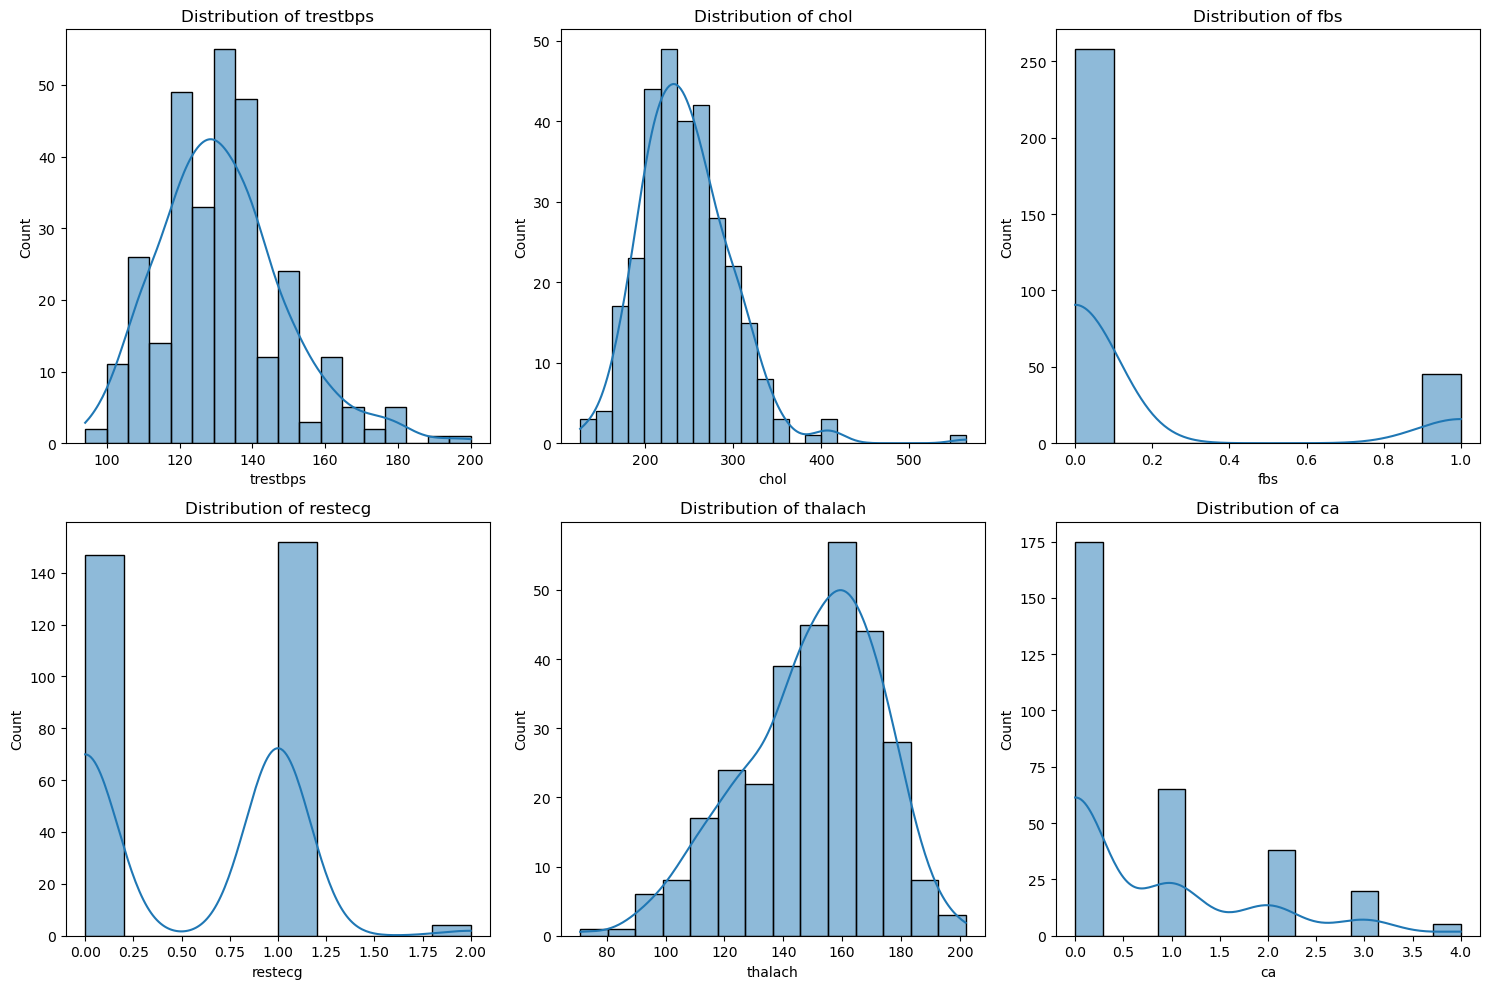

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


columns_to_plot = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'ca']


plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()